In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import scipy.io

In [4]:
file_path = r"C:\Users\V304-18\Documents\GitHub\Neurociencias-2026-1\S03_datasets\BCT\macaque47.mat"

In [7]:
file_dict= scipy.io.loadmat(file_path)
file_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jun 29 12:11:31 2007',
 '__version__': '1.0',
 '__globals__': [],
 'CIJ': array([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(47, 47), dtype=uint8),
 'Names': array(['1   ', '2   ', '35  ', '36  ', '46  ', '5   ', 'Id  ', 'VP  ',
        '3a  ', '3b  ', '4   ', '6   ', '7a  ', '7b  ', 'AITd', 'AITv',
        'CITd', 'CITv', 'DP  ', 'FEF ', 'FST ', 'Ig  ', 'LIP ', 'MDP ',
        'MIP ', 'MSTd', 'MSTl', 'MT  ', 'PIP ', 'PITd', 'PITv', 'PO  ',
        'Ri  ', 'SII ', 'SMA ', 'STPa', 'STPp', 'TF  ', 'TH  ', 'V1  ',
        'V2  ', 'V3  ', 'V3A ', 'V4  ', 'V4t ', 'VIP ', 'VOT '],
       dtype='<U4')}

In [8]:
matriz= file_dict["CIJ"]

In [42]:
columnas= file_dict["Names"]
matriz.shape, len(columnas)

((47, 47), 47)

In [53]:
macaco_df= pd.DataFrame(data= matriz, columns= columnas, index=columnas)
macaco_df.columns= [columna.split(sep=" ")[0] for columna in macaco_df.columns]
macaco_df.index= macaco_df.columns
macaco_df.columns

Index(['1', '2', '35', '36', '46', '5', 'Id', 'VP', '3a', '3b', '4', '6', '7a',
       '7b', 'AITd', 'AITv', 'CITd', 'CITv', 'DP', 'FEF', 'FST', 'Ig', 'LIP',
       'MDP', 'MIP', 'MSTd', 'MSTl', 'MT', 'PIP', 'PITd', 'PITv', 'PO', 'Ri',
       'SII', 'SMA', 'STPa', 'STPp', 'TF', 'TH', 'V1', 'V2', 'V3', 'V3A', 'V4',
       'V4t', 'VIP', 'VOT'],
      dtype='object')

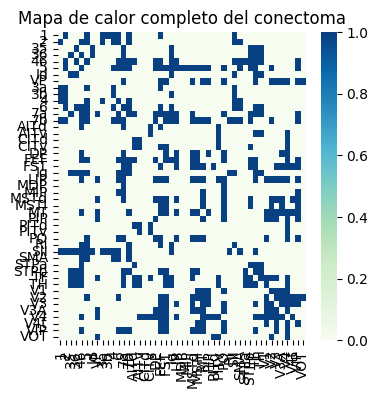

In [54]:
plt.figure(figsize=(4,4))
ax = sns.heatmap(
    macaco_df.values,
    annot= False, cmap="GnBu", fmt=".2f",
    xticklabels=macaco_df.columns, yticklabels=macaco_df.columns)
plt.title('Mapa de calor completo del conectoma')
plt.show()

### Actividad

In [55]:
act = macaco_df.iloc[15:36, 15:36]
act.head()

,AITv,CITd,CITv,DP,FEF,FST,Ig,LIP,MDP,MIP,...,MSTl,MT,PIP,PITd,PITv,PO,Ri,SII,SMA,STPa
AITv,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
CITd,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
CITv,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
DP,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
FEF,0,0,0,1,0,1,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0


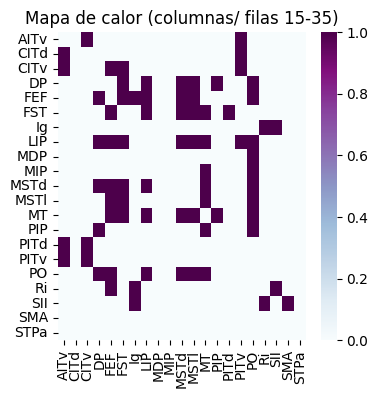

In [56]:
plt.figure(figsize=(4,4))
mapa = sns.heatmap(
    act.values,
    annot=False, cmap="BuPu", fmt=".2f",
    xticklabels = act.columns, yticklabels=act.columns)
plt.title("Mapa de calor (columnas/ filas 15-35)")
plt.show()

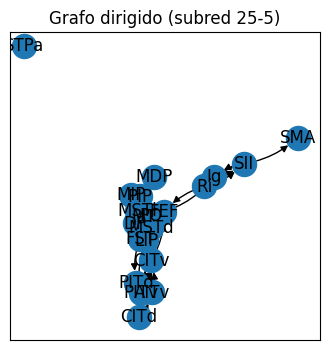

In [58]:
plt.figure(figsize=(4,4))
G = nx.from_pandas_adjacency(act, create_using= nx.DiGraph)
pos = nx.spring_layout(G)
nx.draw_networkx(
    G, pos, with_labels=True, arrows=True,
    arrowstyle="-|>", connectionstyle="arc3, rad=0.15")
plt.title("Grafo dirigido (subred 25-5)")
plt.show()

In [59]:
grado= dict(G.degree())
grado

{'AITv': 6,
 'CITd': 2,
 'CITv': 7,
 'DP': 11,
 'FEF': 15,
 'FST': 13,
 'Ig': 5,
 'LIP': 14,
 'MDP': 1,
 'MIP': 2,
 'MSTd': 12,
 'MSTl': 10,
 'MT': 14,
 'PIP': 5,
 'PITd': 3,
 'PITv': 6,
 'PO': 15,
 'Ri': 5,
 'SII': 5,
 'SMA': 1,
 'STPa': 0}

In [60]:
coord_path=r"C:\Users\V304-18\Documents\GitHub\Neurociencias-2026-1\S03_datasets\BCT\macaco_M132_F99_LH.csv"
coord = pd.read_csv(coord_path)
coord.set_index("region", inplace=True, drop=True)
coord.head()

,x,y,z
region,,,
V1,-13.2,-76.5,7.5
V2,-11.1,-70.4,10.2
V3,-9.3,-66.1,11.9
V3A,-12.8,-61.9,13.9
V4,-7.8,-57.8,13.1


In [61]:
pos3D = {
    region: (coord.loc[region, "x"], coord.loc[region, "y"], coord.loc[region, "z"])
    for region in coord.index}

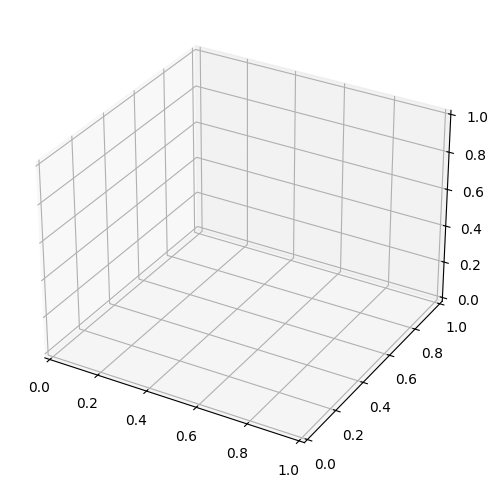

In [62]:
G = nx.from_pandas_adjacency(macaco_df, create_using=nx.DiGraph)

fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d")

In [63]:
for region, (x, y, z) in pos3D.items():
    ax.scatter(x, y, z, s=100)
    ax.text(x, y, z+0.03, region, fontsize=8, ha="center")

In [66]:
for i, j, data in G.edges(data=True):
    x = [pos3D[i][0], pos3D[j][0]]
    y = [pos3D[i][1], pos3D[j][1]]
    z = [pos3D[i][2], pos3D[j][2]]
    ax.plot(x, y, z, linewidth=data["weight"]*4)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Conectoma 3D del macaco")

plt.show()
 

In [67]:
plt.show()